# Numerical ramp for smooth acceleration

Uses a sinusoidal profile to achieve smooth velocity transient

We are using `simpy` for symbolic mathematics, `numpy` for mathematics and `matplotlib.pyplot` for graphics

In [12]:
import numpy as np
import matplotlib.pyplot as pyplot
import sympy
from IPython.display import display

sympy.init_printing()


The movement we will smooth is a sinusoidal translation with frequency $freq$ and angular velocity $\omega$

In [13]:
freq = 1.00 # Hertz
ω, x = sympy.symbols('\omega, x')
ω = 2*sympy.pi*freq
movement = sympy.sin(ω*x)

f = sympy.Lambda(x, movement)
df = sympy.Lambda(x, movement.diff(x))
ddf = sympy.Lambda(x, movement.diff(x,2))
display (f, df, ddf)

Observe in the following graph that the velocity at instant $t=0$ is at the maximum

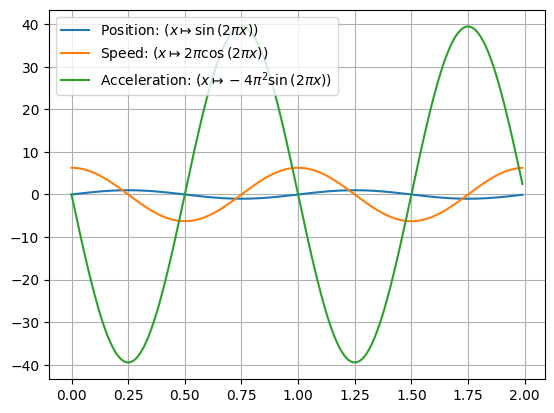

In [14]:
range = sympy.Array(np.arange(0, 2, 0.01))

pyplot.plot(range, range.applyfunc(f), label='Position: $' + sympy.latex(f) + '$' )
pyplot.plot( range, range.applyfunc(df), label="Speed: $" + sympy.latex(df) + '$' )
pyplot.plot(range, range.applyfunc(ddf), label ="Acceleration: $" + sympy.latex(ddf) + '$' )
pyplot.legend()
pyplot.grid()

Here we define the following transition ramp from instant $t=0$ to $t=1/freq$

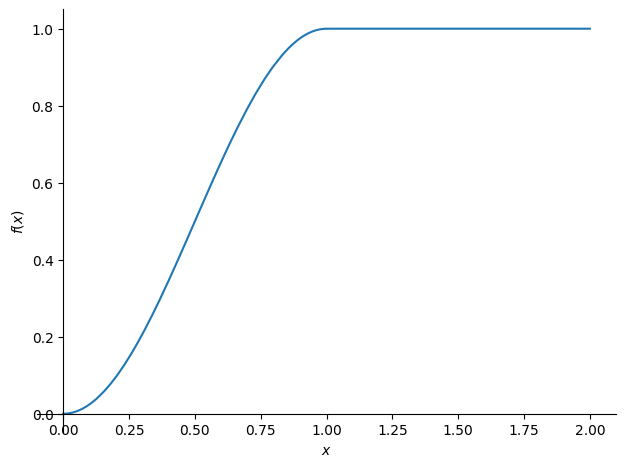

In [15]:
cut = 1/freq

ramp = (1-sympy.cos(ω/2*x)) / 2
sympy.plot(sympy.Piecewise((ramp, sympy.LessThan(x, cut)), (1, True)), (x, 0, 2))

And applying the ramp to the movement we have

⎧⎛1   cos(π⋅x)⎞                        
⎪⎜─ - ────────⎟⋅sin(2⋅π⋅x)  for x ≤ 1.0
⎨⎝2      2    ⎠                        
⎪                                      
⎩       sin(2⋅π⋅x)           otherwise 

⎧    ⎛1   cos(π⋅x)⎞              π⋅sin(π⋅x)⋅sin(2⋅π⋅x)             
⎪2⋅π⋅⎜─ - ────────⎟⋅cos(2⋅π⋅x) + ─────────────────────  for x ≤ 1.0
⎨    ⎝2      2    ⎠                        2                       
⎪                                                                  
⎩                   2⋅π⋅cos(2⋅π⋅x)                       otherwise 

⎧ 2 ⎛                                                      sin(2⋅π⋅x)⋅cos(π⋅x)
⎪π ⋅⎜2⋅(cos(π⋅x) - 1)⋅sin(2⋅π⋅x) + 2⋅sin(π⋅x)⋅cos(2⋅π⋅x) + ───────────────────
⎪   ⎝                                                               2         
⎨                                                                             
⎪                                   2                                         
⎪                               -4⋅π ⋅sin(2⋅π⋅x)                              
⎩                                                                             

⎞             
⎟  for x ≤ 1.0
⎠             
              
              
    otherwise 
              

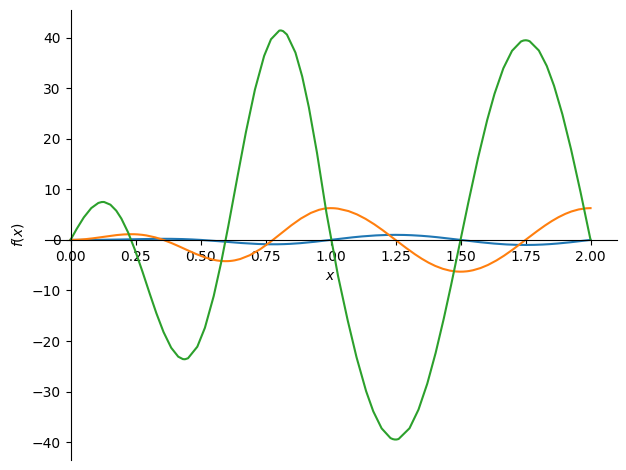

In [16]:
eq = ramp*movement

sl = sympy.Piecewise((eq , sympy.LessThan(x, cut)), (movement, True)) 
dsl = sympy.Piecewise((eq.diff(x), sympy.LessThan(x, cut)), (movement.diff(x), True)) 
ddsl = sympy.Piecewise((eq.diff(x,2), sympy.LessThan(x, cut)), (movement.diff(x,2), True)) 
display(sl, dsl, ddsl)

sympy.plot(sl, dsl, ddsl, (x, 0, 2))

In [17]:
lambda1 = sympy.Lambda(x, sl)
dlambda1 = sympy.Lambda(x, dsl)
ddlambda1 = sympy.Lambda(x, ddsl)

Here is the plotted result of such approach for position, velocity and acceleration

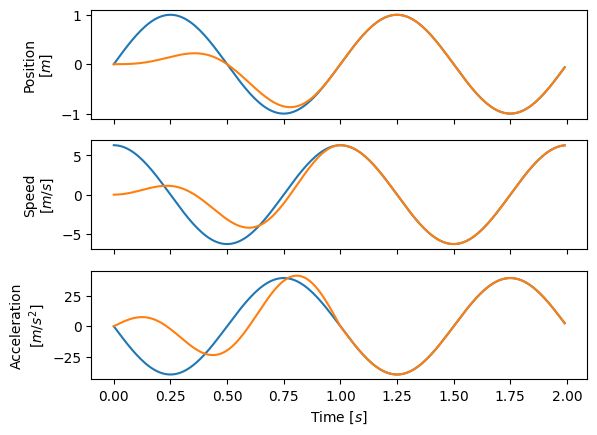

In [19]:
fig, axs = pyplot.subplots(3, sharex=True)

axs[0].set_ylabel("Position\n[$m$]")
axs[0].plot(range, range.applyfunc(f), label='Sem rampa')
axs[0].plot(range, range.applyfunc(lambda1), label='Com rampa')

axs[1].set_ylabel("Speed\n[$m/s$]")
axs[1].plot(range, range.applyfunc(df), label='Sem rampa')
axs[1].plot(range, range.applyfunc(dlambda1), label='Com rampa')


axs[2].set_ylabel('Acceleration\n[$m/s^2$]')
axs[2].set_xlabel("Time [$s$]")
axs[2].plot(range, range.applyfunc(ddf), label='Sem rampa')
axs[2].plot(range, range.applyfunc(ddlambda1), label='Com rampa')
